In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
import warnings
import os
import pickle

In [63]:
df1 = pd.read_excel(r"C:\Users\Shubham\Downloads\case_study1 (1).xlsx")
df2=  pd.read_excel(r"C:\Users\Shubham\Downloads\case_study2 (1).xlsx")

In [64]:
df1.sample(5)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
9495,9496,4,2,2,0,0,0.0,0.000,0.500,0.500,...,0,0,0,0,0,2,2,3,80,45
39023,39024,2,2,0,0,0,0.0,0.000,0.000,1.000,...,0,0,1,0,0,2,0,0,61,43
42862,42863,3,2,1,0,1,0.0,0.333,0.333,0.667,...,0,1,0,0,0,2,1,0,37,12
12685,12686,1,1,0,0,0,0.0,0.000,0.000,1.000,...,0,0,0,0,0,0,1,1,52,52
11673,11674,1,0,1,0,0,0.0,0.000,1.000,0.000,...,0,0,0,0,0,0,1,1,10,10


In [65]:
df1.duplicated().sum()

0

In [66]:
#Remove nulls
df1 = df1[df1['Age_Oldest_TL'] != -99999]

In [67]:
df1.shape
df2.duplicated().sum()

0

In [69]:
to_delete = []

for i in df2.columns:
     if df2[df2[i]==-99999].shape[0] > 10000:
            to_delete.append(i)
            print(i,df2[df2[i]==-99999].shape[0])

time_since_first_deliquency 35949
time_since_recent_deliquency 35949
max_delinquency_level 35949
max_deliq_6mts 12890
max_deliq_12mts 10832
CC_utilization 47636
PL_utilization 44435
max_unsec_exposure_inPct 23178


In [70]:
df2.drop(columns=to_delete,inplace=True)

In [71]:
for i in df2.columns:
    df2 = df2[df2[i]!=-99999]

In [72]:
df2

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,11,29,0,0,0,0,0,21,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,47,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,9,25,1,9,8,0,0,10,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
4,5,583,0,0,0,0,0,0,0,53,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
5,6,245,14,270,0,0,0,13,11,5,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,2,24,0,0,0,0,0,0,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,57,0,0,0,0,0,0,0,6,...,0.0,0.0,0.000,0.0,0,0,others,others,702,P1
51333,51334,32,0,0,0,0,0,0,0,0,...,1.0,0.0,1.000,0.0,0,0,ConsumerLoan,others,661,P3
51334,51335,58,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,others,686,P2


In [73]:
#Checking common column

for i in df1.columns:
    if i in df2.columns:
        print(i)

PROSPECTID


In [74]:
#Merging two tables based on prospectID
df = pd.merge(df1,df2,on='PROSPECTID')

In [75]:
df

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.00,0.167,0.833,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,650,P4
42060,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,others,others,702,P1
42061,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,1.0,0.0,1.000,0.0,0,0,ConsumerLoan,others,661,P3
42062,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,others,686,P2


In [76]:
df.shape

(42064, 79)

In [16]:
#WE Will divide the features into categorical and numerical and treat them separately

In [77]:
for i in df.select_dtypes(include='object').columns:
    print("column name: ",i)
    print(df[i].value_counts())
    print("\n--------------------\n")

column name:  MARITALSTATUS
Married    30886
Single     11178
Name: MARITALSTATUS, dtype: int64

--------------------

column name:  EDUCATION
GRADUATE          14140
12TH              11703
SSC                7241
UNDER GRADUATE     4572
OTHERS             2291
POST-GRADUATE      1898
PROFESSIONAL        219
Name: EDUCATION, dtype: int64

--------------------

column name:  GENDER
M    37345
F     4719
Name: GENDER, dtype: int64

--------------------

column name:  last_prod_enq2
ConsumerLoan    16480
others          13653
PL               7553
CC               2195
AL               1353
HL                830
Name: last_prod_enq2, dtype: int64

--------------------

column name:  first_prod_enq2
others          20640
ConsumerLoan    11075
PL               4431
AL               2641
CC               1988
HL               1289
Name: first_prod_enq2, dtype: int64

--------------------

column name:  Approved_Flag
P2    25452
P3     6440
P4     5264
P1     4908
Name: Approved_Flag, dtype:

In [78]:
#Association of categorial variables with approved Flag
for i in df.select_dtypes(include='object').columns[0:-1]:
    chi2,pval,dof,_ = chi2_contingency(pd.crosstab(df[i],df['Approved_Flag']))
    print(i,'----',pval,pval < 0.05)
    
#ALl categorical features have pcal <= 0.05, we will accept all

MARITALSTATUS ---- 3.578180861038862e-233 True
EDUCATION ---- 2.6942265249737532e-30 True
GENDER ---- 1.907936100186563e-05 True
last_prod_enq2 ---- 0.0 True
first_prod_enq2 ---- 7.84997610555419e-287 True


In [79]:
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i != 'PROSPECTID' :
        numeric_columns.append(i)
        
numeric_columns

['Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Total_TL_opened_L12M',
 'Tot_TL_closed_L12M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'Auto_TL',
 'CC_TL',
 'Consumer_TL',
 'Gold_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'num_times_delinquent',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',

In [80]:
vif_data = df[numeric_columns]

In [81]:
#LEts identify columns with high multicolinearity, we will remove them
columns_to_kept = []
column_index = 0


for i in range(0,vif_data.shape[1]):
    vif_value = variance_inflation_factor(vif_data,column_index)
    print(column_index,"-----",vif_value)
    
    if vif_value <=6:
        columns_to_kept.append(numeric_columns[i])
        column_index+=1
        
    else:
        vif_data.drop(columns=[numeric_columns[i]],inplace=True)

C:\Users\Shubham\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)
C:\Users\Shubham\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

0 ----- inf
0 ----- inf
0 ----- 11.320180023967996
0 ----- 8.363698035000336


C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)


0 ----- 6.520647877790928
0 ----- 5.149501618212625


C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)


1 ----- 2.611111040579735
2 ----- inf


C:\Users\Shubham\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)


2 ----- 1788.7926256209232
2 ----- 8.601028256477228


C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)


2 ----- 3.8328007921530785
3 ----- 6.0996533816467355


C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)


3 ----- 5.5813520096427585
4 ----- 1.985584353098778


C:\Users\Shubham\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)


5 ----- inf
5 ----- 4.809538302819343
6 ----- 23.270628983464636
6 ----- 30.595522588100053


C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)


6 ----- 4.3843464059655854
7 ----- 3.064658415523423
8 ----- 2.898639771299252
9 ----- 4.377876915347322
10 ----- 2.2078535836958433
11 ----- 4.916914200506864
12 ----- 5.214702030064725
13 ----- 3.3861625024231476
14 ----- 7.840583309478997
14 ----- 5.255034641721438


C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)
C:\Users\Shubham\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A v

15 ----- inf
15 ----- 7.380634506427232
15 ----- 1.4210050015175733
16 ----- 8.083255010190323


C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)


16 ----- 1.6241227524040114
17 ----- 7.257811920140003


C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)


17 ----- 15.59624383268298
17 ----- 1.825857047132431
18 ----- 1.5080839450032664
19 ----- 2.172088834824578
20 ----- 2.623397553527229
21 ----- 2.2959970812106167
22 ----- 7.360578319196446
22 ----- 2.1602387773102554


C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)


23 ----- 2.8686288267891467
24 ----- 6.458218003637272


C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)


24 ----- 2.8474118865638265
25 ----- 4.7531981562840855
26 ----- 16.22735475594825


C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

26 ----- 6.424377256363877
26 ----- 8.887080381808687
26 ----- 2.3804746142952653
27 ----- 8.609513476514548
27 ----- 13.06755093547673
27 ----- 3.5000400566546555


C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)


28 ----- 1.9087955874813773
29 ----- 17.006562234161628
29 ----- 10.730485153719197


C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)


29 ----- 2.3538497522950275
30 ----- 22.104855915136433
30 ----- 2.7971639638512924


C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)


31 ----- 3.424171203217696
32 ----- 10.175021454450922
32 ----- 6.408710354561301


C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)


32 ----- 1.001151196262561
33 ----- 3.069197305397274
34 ----- 2.8091261600643724
35 ----- 20.249538381980678
35 ----- 15.864576541593774
35 ----- 1.8331649740532172


C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)


36 ----- 1.5680839909542037
37 ----- 1.9307572353811682
38 ----- 4.331265056645247
39 ----- 9.390334396150173


C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\3828138428.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_data.drop(columns=[numeric_columns[i]],inplace=True)


In [82]:
len(columns_to_kept)

39

In [83]:
#We will identify of each dependent column with target column.
df

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.00,0.167,0.833,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,650,P4
42060,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,others,others,702,P1
42061,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,1.0,0.0,1.000,0.0,0,0,ConsumerLoan,others,661,P3
42062,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,others,686,P2


In [84]:
from scipy.stats import f_oneway

columns_to_be_kept_numerical = []

for i in columns_to_kept:
    a = list(df[i])
    b = list(df['Approved_Flag'])
    
    group_p1 = [value for value,group in zip(a,b) if group =='P1']
    group_p2 = [value for value,group in zip(a,b) if group =='P2']
    group_p3 = [value for value,group in zip(a,b) if group =='P3']
    group_p4 = [value for value,group in zip(a,b) if group =='P4']
    
    f_stat,p_value = f_oneway(group_p1,group_p2,group_p3,group_p4)
    
    if p_value <=0.05:
        columns_to_be_kept_numerical.append(i)

In [85]:
len(columns_to_be_kept_numerical)

37

In [86]:
columns_to_be_kept_numerical

['pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'Tot_TL_closed_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'CC_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'max_recent_level_of_deliq',
 'num_deliq_6_12mts',
 'num_times_60p_dpd',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_12mts',
 'num_lss',
 'recent_level_of_deliq',
 'CC_enq_L12m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L3m',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'CC_Flag',
 'PL_Flag',
 'pct_PL_enq_L6m_of_ever',
 'pct_CC_enq_L6m_of_ever',
 'HL_Flag',
 'GL_Flag']

In [87]:
features = columns_to_be_kept_numerical + ['MARITALSTATUS','EDUCATION','GENDER',"last_prod_enq2",'first_prod_enq2']
df = df[features + ['Approved_Flag']]

In [88]:
df

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
0,0.000,0.00,0,0.000,0,0,0,4,1,4,...,0.000,0.0,1,0,Married,12TH,M,PL,PL,P2
1,0.000,0.00,0,0.000,0,0,0,0,0,1,...,0.000,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,P2
2,0.125,0.00,0,0.000,1,0,0,0,2,6,...,0.000,0.0,1,0,Married,SSC,M,ConsumerLoan,others,P2
3,0.000,0.00,0,0.000,0,0,0,0,3,0,...,0.000,0.0,0,0,Married,POST-GRADUATE,M,AL,AL,P1
4,0.000,0.00,1,0.167,0,0,0,0,6,0,...,0.429,0.0,1,0,Married,12TH,M,ConsumerLoan,PL,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,0.333,0.00,0,0.000,0,0,0,0,0,3,...,0.000,0.0,0,0,Married,12TH,M,ConsumerLoan,ConsumerLoan,P4
42060,0.000,0.25,1,0.250,0,0,0,0,2,2,...,0.000,0.0,0,0,Married,SSC,M,others,others,P1
42061,0.500,0.50,1,0.500,0,0,0,0,0,2,...,1.000,0.0,0,0,Married,SSC,M,ConsumerLoan,others,P3
42062,0.000,0.00,1,0.500,0,0,0,0,0,2,...,0.000,0.0,0,0,Single,UNDER GRADUATE,F,ConsumerLoan,others,P2


In [89]:
df['MARITALSTATUS'].unique()

array(['Married', 'Single'], dtype=object)

In [90]:
df

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
0,0.000,0.00,0,0.000,0,0,0,4,1,4,...,0.000,0.0,1,0,Married,12TH,M,PL,PL,P2
1,0.000,0.00,0,0.000,0,0,0,0,0,1,...,0.000,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,P2
2,0.125,0.00,0,0.000,1,0,0,0,2,6,...,0.000,0.0,1,0,Married,SSC,M,ConsumerLoan,others,P2
3,0.000,0.00,0,0.000,0,0,0,0,3,0,...,0.000,0.0,0,0,Married,POST-GRADUATE,M,AL,AL,P1
4,0.000,0.00,1,0.167,0,0,0,0,6,0,...,0.429,0.0,1,0,Married,12TH,M,ConsumerLoan,PL,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,0.333,0.00,0,0.000,0,0,0,0,0,3,...,0.000,0.0,0,0,Married,12TH,M,ConsumerLoan,ConsumerLoan,P4
42060,0.000,0.25,1,0.250,0,0,0,0,2,2,...,0.000,0.0,0,0,Married,SSC,M,others,others,P1
42061,0.500,0.50,1,0.500,0,0,0,0,0,2,...,1.000,0.0,0,0,Married,SSC,M,ConsumerLoan,others,P3
42062,0.000,0.00,1,0.500,0,0,0,0,0,2,...,0.000,0.0,0,0,Single,UNDER GRADUATE,F,ConsumerLoan,others,P2


In [91]:
df['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [92]:
df['last_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'AL', 'CC', 'others', 'HL'], dtype=object)

In [93]:
df['first_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

In [94]:
#Education is Ordinal Feature, we will do label encoding to it.

In [95]:
df['EDUCATION'].value_counts()

GRADUATE          14140
12TH              11703
SSC                7241
UNDER GRADUATE     4572
OTHERS             2291
POST-GRADUATE      1898
PROFESSIONAL        219
Name: EDUCATION, dtype: int64

In [96]:
df['EDUCATION'].value_counts()

GRADUATE          14140
12TH              11703
SSC                7241
UNDER GRADUATE     4572
OTHERS             2291
POST-GRADUATE      1898
PROFESSIONAL        219
Name: EDUCATION, dtype: int64

In [97]:
label_encoder = LabelEncoder()

df['EDUCATION'] = label_encoder.fit_transform(df['EDUCATION'])

C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\532994742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDUCATION'] = label_encoder.fit_transform(df['EDUCATION'])


In [98]:
df['EDUCATION'].value_counts()

1    14140
0    11703
5     7241
6     4572
2     2291
3     1898
4      219
Name: EDUCATION, dtype: int64

In [99]:
df['EDUCATION']=df['EDUCATION'].astype('int')

C:\Users\Shubham\AppData\Local\Temp\ipykernel_14308\2900898982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDUCATION']=df['EDUCATION'].astype('int')


In [100]:
df

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
0,0.000,0.00,0,0.000,0,0,0,4,1,4,...,0.000,0.0,1,0,Married,0,M,PL,PL,P2
1,0.000,0.00,0,0.000,0,0,0,0,0,1,...,0.000,0.0,0,0,Single,1,F,ConsumerLoan,ConsumerLoan,P2
2,0.125,0.00,0,0.000,1,0,0,0,2,6,...,0.000,0.0,1,0,Married,5,M,ConsumerLoan,others,P2
3,0.000,0.00,0,0.000,0,0,0,0,3,0,...,0.000,0.0,0,0,Married,3,M,AL,AL,P1
4,0.000,0.00,1,0.167,0,0,0,0,6,0,...,0.429,0.0,1,0,Married,0,M,ConsumerLoan,PL,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,0.333,0.00,0,0.000,0,0,0,0,0,3,...,0.000,0.0,0,0,Married,0,M,ConsumerLoan,ConsumerLoan,P4
42060,0.000,0.25,1,0.250,0,0,0,0,2,2,...,0.000,0.0,0,0,Married,5,M,others,others,P1
42061,0.500,0.50,1,0.500,0,0,0,0,0,2,...,1.000,0.0,0,0,Married,5,M,ConsumerLoan,others,P3
42062,0.000,0.00,1,0.500,0,0,0,0,0,2,...,0.000,0.0,0,0,Single,6,F,ConsumerLoan,others,P2


In [101]:
df_encoded = pd.get_dummies(df,columns = ['MARITALSTATUS','GENDER',"last_prod_enq2",'first_prod_enq2'])

In [102]:
df_encoded

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_AL,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,0.000,0.00,0,0.000,0,0,0,4,1,4,...,0,0,1,0,0,0,0,0,1,0
1,0.000,0.00,0,0.000,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,0.125,0.00,0,0.000,1,0,0,0,2,6,...,1,0,0,0,0,0,0,0,0,1
3,0.000,0.00,0,0.000,0,0,0,0,3,0,...,0,0,0,0,1,0,0,0,0,0
4,0.000,0.00,1,0.167,0,0,0,0,6,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,0.333,0.00,0,0.000,0,0,0,0,0,3,...,1,0,0,0,0,0,1,0,0,0
42060,0.000,0.25,1,0.250,0,0,0,0,2,2,...,0,0,0,1,0,0,0,0,0,1
42061,0.500,0.50,1,0.500,0,0,0,0,0,2,...,1,0,0,0,0,0,0,0,0,1
42062,0.000,0.00,1,0.500,0,0,0,0,0,2,...,1,0,0,0,0,0,0,0,0,1


In [103]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42064 entries, 0 to 42063
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               42064 non-null  float64
 1   pct_tl_closed_L6M             42064 non-null  float64
 2   Tot_TL_closed_L12M            42064 non-null  int64  
 3   pct_tl_closed_L12M            42064 non-null  float64
 4   Tot_Missed_Pmnt               42064 non-null  int64  
 5   CC_TL                         42064 non-null  int64  
 6   Home_TL                       42064 non-null  int64  
 7   PL_TL                         42064 non-null  int64  
 8   Secured_TL                    42064 non-null  int64  
 9   Unsecured_TL                  42064 non-null  int64  
 10  Other_TL                      42064 non-null  int64  
 11  Age_Oldest_TL                 42064 non-null  int64  
 12  Age_Newest_TL                 42064 non-null  int64  
 13  t

In [104]:
#Data Processing

#1.Random Forest

x = df_encoded.drop(columns='Approved_Flag')
y=df_encoded['Approved_Flag']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

model = RandomForestClassifier(n_estimators=200,random_state = 42)

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)

print(f"Accuracy Score: {accuracy}")

precision,recall,f1_score,_ = precision_recall_fscore_support(y_test,y_pred)

for i,v in enumerate(['p1','p2','p3','p4']):
    print(f"Class: {v}")
    print(f"Precision: {precision[i]}")
    print(f"recall: {recall[i]}")
    print(f"f1 score: {f1_score[i]}")
    print("-------------")

Accuracy Score: 0.762985855224058
Class: p1
Precision: 0.8329411764705882
recall: 0.6982248520710059
f1 score: 0.7596566523605149
-------------
Class: p2
Precision: 0.7947761194029851
recall: 0.9288404360753221
f1 score: 0.8565944612009871
-------------
Class: p3
Precision: 0.4377952755905512
recall: 0.20981132075471698
f1 score: 0.2836734693877551
-------------
Class: p4
Precision: 0.7238372093023255
recall: 0.7259475218658892
f1 score: 0.7248908296943232
-------------


In [257]:
#2 XGBoost

import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(objective ='multi:softmax',num_class = 4)
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)


x_train,x_test,y_train,y_test = train_test_split(x,y_encoded,test_size = 0.2,random_state = 42)

xgb_classifier.fit(x_train,y_train)
y_pred = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)

print(f"Accuracy Score: {accuracy:.2f}")

precision,recall,f1_score,_ = precision_recall_fscore_support(y_test,y_pred)

for i,v in enumerate(['p1','p2','p3','p4']):
    print(f"Class: {v}")
    print(f"Precision: {precision[i]}")
    print(f"recall: {recall[i]}")
    print(f"f1 score: {f1_score[i]}")
    print("-------------")

Accuracy Score: 0.77
Class: p1
Precision: 0.8156484458735263
recall: 0.7504930966469427
f1 score: 0.7817154596815614
-------------
Class: p2
Precision: 0.8216138844158167
recall: 0.9102081268582756
f1 score: 0.863644912544668
-------------
Class: p3
Precision: 0.4548651817116061
recall: 0.29283018867924526
f1 score: 0.3562901744719927
-------------
Class: p4
Precision: 0.7225433526011561
recall: 0.7288629737609329
f1 score: 0.725689404934688
-------------


In [98]:
#Random forest = 0.76
#XGBoost = 0.78

In [106]:
# 3. Decision Tree
from sklearn.tree import DecisionTreeClassifier


y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f"Accuracy: {accuracy:.2f}")
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()



Accuracy: 0.72

Class p1:
Precision: 0.7240356083086054
Recall: 0.7218934911242604
F1 Score: 0.7229629629629629

Class p2:
Precision: 0.8115102356122055
Recall: 0.8329038652130822
F1 Score: 0.8220678861390981

Class p3:
Precision: 0.3542168674698795
Recall: 0.3328301886792453
F1 Score: 0.3431906614785992

Class p4:
Precision: 0.6618998978549541
Recall: 0.6297376093294461
F1 Score: 0.6454183266932271



In [47]:
#Random forest = 0.76
#XGBoost = 0.78
#Decision Tree = 0.71

<Axes: ylabel='Approved_Flag'>

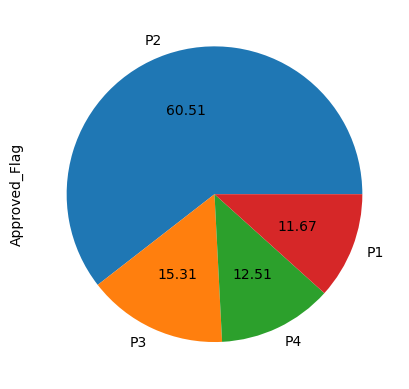

In [48]:
df_encoded['Approved_Flag'].value_counts().plot(kind='pie',autopct='%.2f')

In [109]:
param_grid = {
    'colsamp_bytree': [0.1,0.3,0.5,0.7,0.9],
    'learning_rate': [0.001,0.01,0.1,1],
    'max_depth': [ 3,5,8,10],
    'alpha': [1,10,100],
    'n_estimators': [10,50,100]
}

Best parameters: {'alpha': 1, 'colsamp_bytree': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
model accuracy on best parameters: XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsamp_bytree=0.1, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, ...)


In [260]:
model = xgb.XGBClassifier(alpha =  1, colsamp_bytree = 0.1, learning_rate = 0.1, max_depth = 5, n_estimators = 100,num_class = 4)

In [322]:
x_train.columns = x_train.columns.str.lower()

In [323]:
model.fit(x_train,y_train)

C:\Users\Shubham\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:03:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsamp_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsamp_bytree=0.1, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, ...)

In [325]:
x_test.columns = x_test.columns.str.lower()
model.predict(x_test)

array([1, 3, 1, ..., 2, 1, 3], dtype=int64)

In [326]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)